In [1]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(42)
car = ['A','B','C','D','E']
price = np.random.randint(1350,1800,5)
print('Car','\t','Price')
for ii,jj in zip(car,price):
    print(ii,'\t',jj)

Car 	 Price
A 	 1452
B 	 1785
C 	 1698
D 	 1620
E 	 1456


In [3]:
chips = np.random.randint(4000,5000,4)
print('Number of chips supply per quarter')
print('')
print('Quater','\t','No of chip')
for ii,jj in enumerate(chips):
    print('Q'+str(ii+1),'\t',jj)

Number of chips supply per quarter

Quater 	 No of chip
Q1 	 4071
Q2 	 4700
Q3 	 4020
Q4 	 4614


In [4]:
chipPrice = np.random.randint(1320,1350,4)
print('Chip price per Quarter')
print('')
print('Quater','\t','Price of chip')
for ii,jj in enumerate(chipPrice):
    print('Q'+str(ii+1),'\t',jj)

Chip price per Quarter

Quater 	 Price of chip
Q1 	 1345
Q2 	 1338
Q3 	 1342
Q4 	 1330


In [5]:
# it will use in pie plot
def absolute_value(val):
    a = np.round(val/100.*vall, 0)
    return a

Quarter_1------>


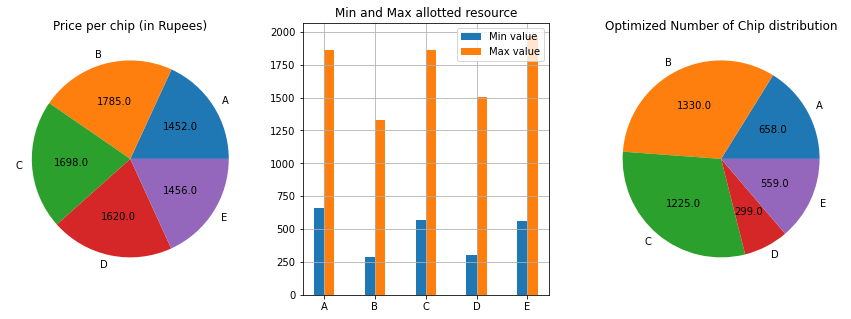

Quarter_2------>


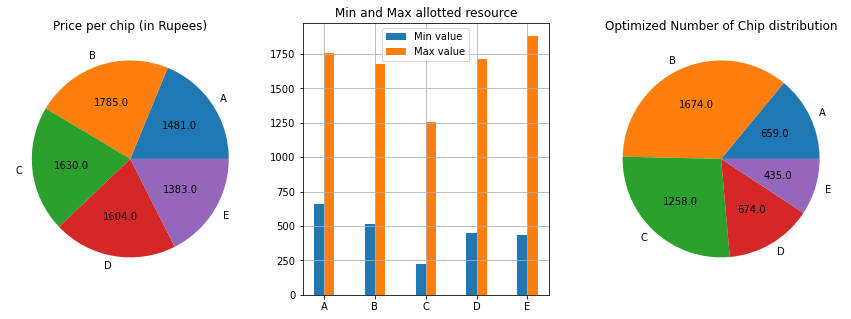

Quarter_3------>


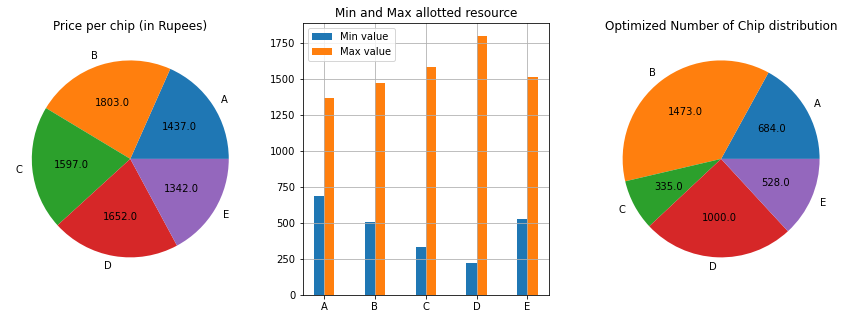

Quarter_4------>


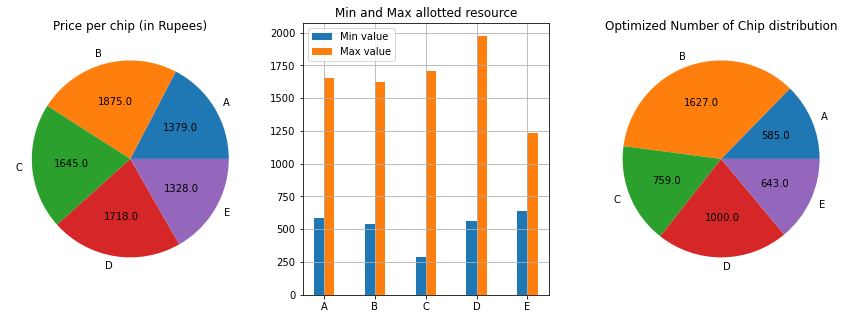

In [6]:
profit = []
for quart in range(4):
    
    minOrd = np.random.randint(200,700,5)
    maxOrd = np.random.randint(1200,2000,5)
    percentInc = np.random.randint(-5,5,5)
    percentInc = percentInc/100+1
    
    model = LpProblem('Chipfit',sense= LpMaximize)
    A = LpVariable('A',lowBound=500,upBound=5000, cat= 'Integer')
    B = LpVariable('B',lowBound=200,upBound=3000, cat= 'Integer')
    C = LpVariable('C',lowBound=300,upBound=4500, cat= 'Integer')
    D = LpVariable('D',lowBound=200,upBound=1000, cat= 'Integer')
    E = LpVariable('E',lowBound=150,upBound=4000, cat= 'Integer')

    
    model += price[0]*A + price[1]*B + price[2]*C + price[3]*D +price[4]*E 
    model += A + B + C + D + E == chips[quart]

    model += A >= minOrd[0]
    model += B >= minOrd[1]
    model += C >= minOrd[2]
    model += D >= minOrd[3]
    model += E >= minOrd[4]

    model += A <= maxOrd[0]
    model += B <= maxOrd[1]
    model += C <= maxOrd[2]
    model += D <= maxOrd[3]
    model += E <= maxOrd[4]

    model.solve()
    print('Quarter_{}------>'.format(quart+1))
    
    
    plt.figure(figsize=[15,5])
    plt.subplot(1,3,1)
    vall = sum(price)
    plt.pie(price,labels=car,autopct=absolute_value)
    plt.title('Price per chip (in Rupees)')
    
    plt.subplot(1,3,2)
    _X = np.arange(len(car))
    plt.bar(_X - 0.1, minOrd, 0.2,label='Min value')
    plt.bar(_X + 0.1, maxOrd, 0.2,label='Max value')
    plt.xticks(_X, car)
    plt.legend()
    plt.grid()
    plt.title('Min and Max allotted resource')
    
    
    plt.subplot(1,3,3)
    optimValue = [A.varValue, B.varValue, C.varValue, D.varValue, E.varValue]
    vall = sum(optimValue)
    plt.pie(optimValue,labels=car,autopct=absolute_value)
    plt.title('Optimized Number of Chip distribution')
    plt.show()
    price = np.round(price * percentInc,2)
    profit.append(value(model.objective)-chips[quart]*chipPrice[quart])

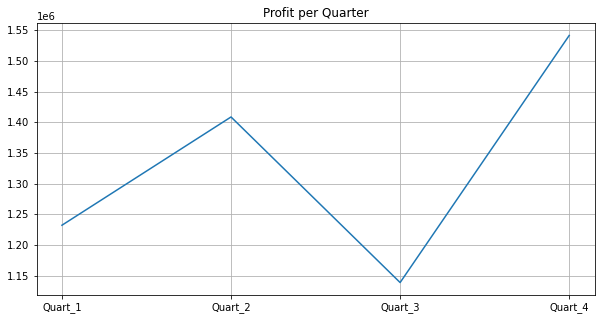

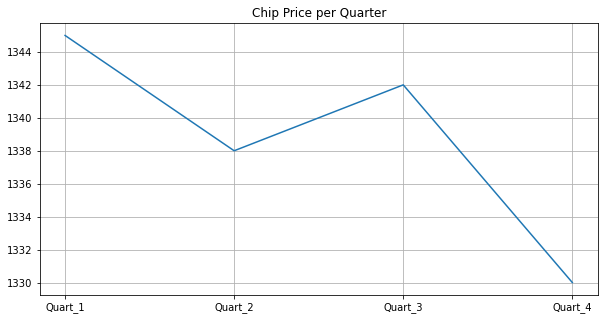

In [7]:
quartList = ['Quart_{}'.format(ii+1) for ii in range(4)]
_X = np.arange(len(quartList))

plt.figure(figsize=[10,5])
plt.plot(_X,profit)
plt.xticks(_X,quartList)
plt.title('Profit per Quarter')
plt.grid()
plt.show()

plt.figure(figsize=[10,5])
plt.plot(_X,chipPrice)
plt.xticks(_X,quartList)
plt.title('Chip Price per Quarter')
plt.grid()
plt.show()